In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 16)
matplotlib.rcParams['figure.dpi'] = 200

In [2]:
import scipy as science
import pandas as pd
import plotly.graph_objects as go

In [3]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,BatchNormalization,Dropout,MaxPooling2D,AveragePooling2D,Activation

In [36]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
# importing libraries
import os
import random
from tqdm import tqdm # for progress bar
from sklearn.model_selection import train_test_split
# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [7]:
from skimage.transform import resize

In [8]:
indices = {}
for i in range(10):
    indices[i]=[]
    for j in range(len(y_train)):

        if y_train[j] == i:
            indices[i].append(j)

In [9]:
p = np.random.randint(1, 6000, size=(9))
fig = plt.figure(figsize=(16, 16))

label = 0

for i in range(len(p)):
    
  # plt.imshow(x_train[p[i]])
  image = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
  image.imshow(x_train[indices[label][p[i]]])
  image.set_title("True label :{}".format((y_train[indices[label][p[i]]])))

In [10]:

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = x_train / 255.0

test_images = x_test / 255.0

In [20]:
vgg_conv = VGG16(weights= 'imagenet' , include_top=False, 
                     input_shape=(48, 48, 3))
vgg_conv.trainable = True
model = tf.keras.Sequential([
    # Add the vgg convolutional base model
    vgg_conv,
    
    # Add new layers
    Flatten(),
    Dense(1024, activation='relu'), 
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,504,970 (59.15 MB)

 Trainable params: 15,504,970 (59.15 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
train_X=np.dstack([x_train] * 3)
test_X=np.dstack([x_test]*3)
train_X.shape,test_X.shape

((60000, 28, 84), (10000, 28, 84))

In [23]:
# Reshape images as per the tensor format required by tensorflow
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [24]:
from keras.preprocessing.image import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])
#train_x = preprocess_input(x)
train_X.shape, test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [25]:
# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [37]:
input_shape = train_X[0].shape
category_number = len(np.unique(y_train))
y_train_dl = to_categorical(y_train, category_number)
y_test_dl = to_categorical(y_test, category_number)

In [38]:
from keras import optimizers
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(),
              metrics=["accuracy"])
epochs = 10
history = model.fit(train_X, y_train_dl,
                    batch_size=64, #Number of simultaneous learning
                    epochs=epochs, #Number of train
                    validation_split=0.18, shuffle=True,)

Epoch 1/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - accuracy: 0.4465 - loss: 1.4216 - val_accuracy: 0.8072 - val_loss: 0.5462
Epoch 2/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 126s 164ms/step - accuracy: 0.8166 - loss: 0.5101 - val_accuracy: 0.8484 - val_loss: 0.4175
Epoch 3/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 130s 169ms/step - accuracy: 0.8539 - loss: 0.4101 - val_accuracy: 0.8682 - val_loss: 0.3682
Epoch 4/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 128s 167ms/step - accuracy: 0.8749 - loss: 0.3450 - val_accuracy: 0.8715 - val_loss: 0.3490
Epoch 5/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 128s 167ms/step - accuracy: 0.8771 - loss: 0.3501 - val_accuracy: 0.8886 - val_loss: 0.3185
Epoch 6/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 129s 167ms/step - accuracy: 0.9007 - loss: 0.2826 - val_accuracy: 0.8942 - val_loss: 0.2982
Epoch 7/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 128s 167ms/step - accuracy: 0.9053 - loss: 0.2634 - val_accuracy: 0.8856 - val_loss: 0.3160
Epoch 8/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 128s 167ms/step - accuracy: 0.9073 -

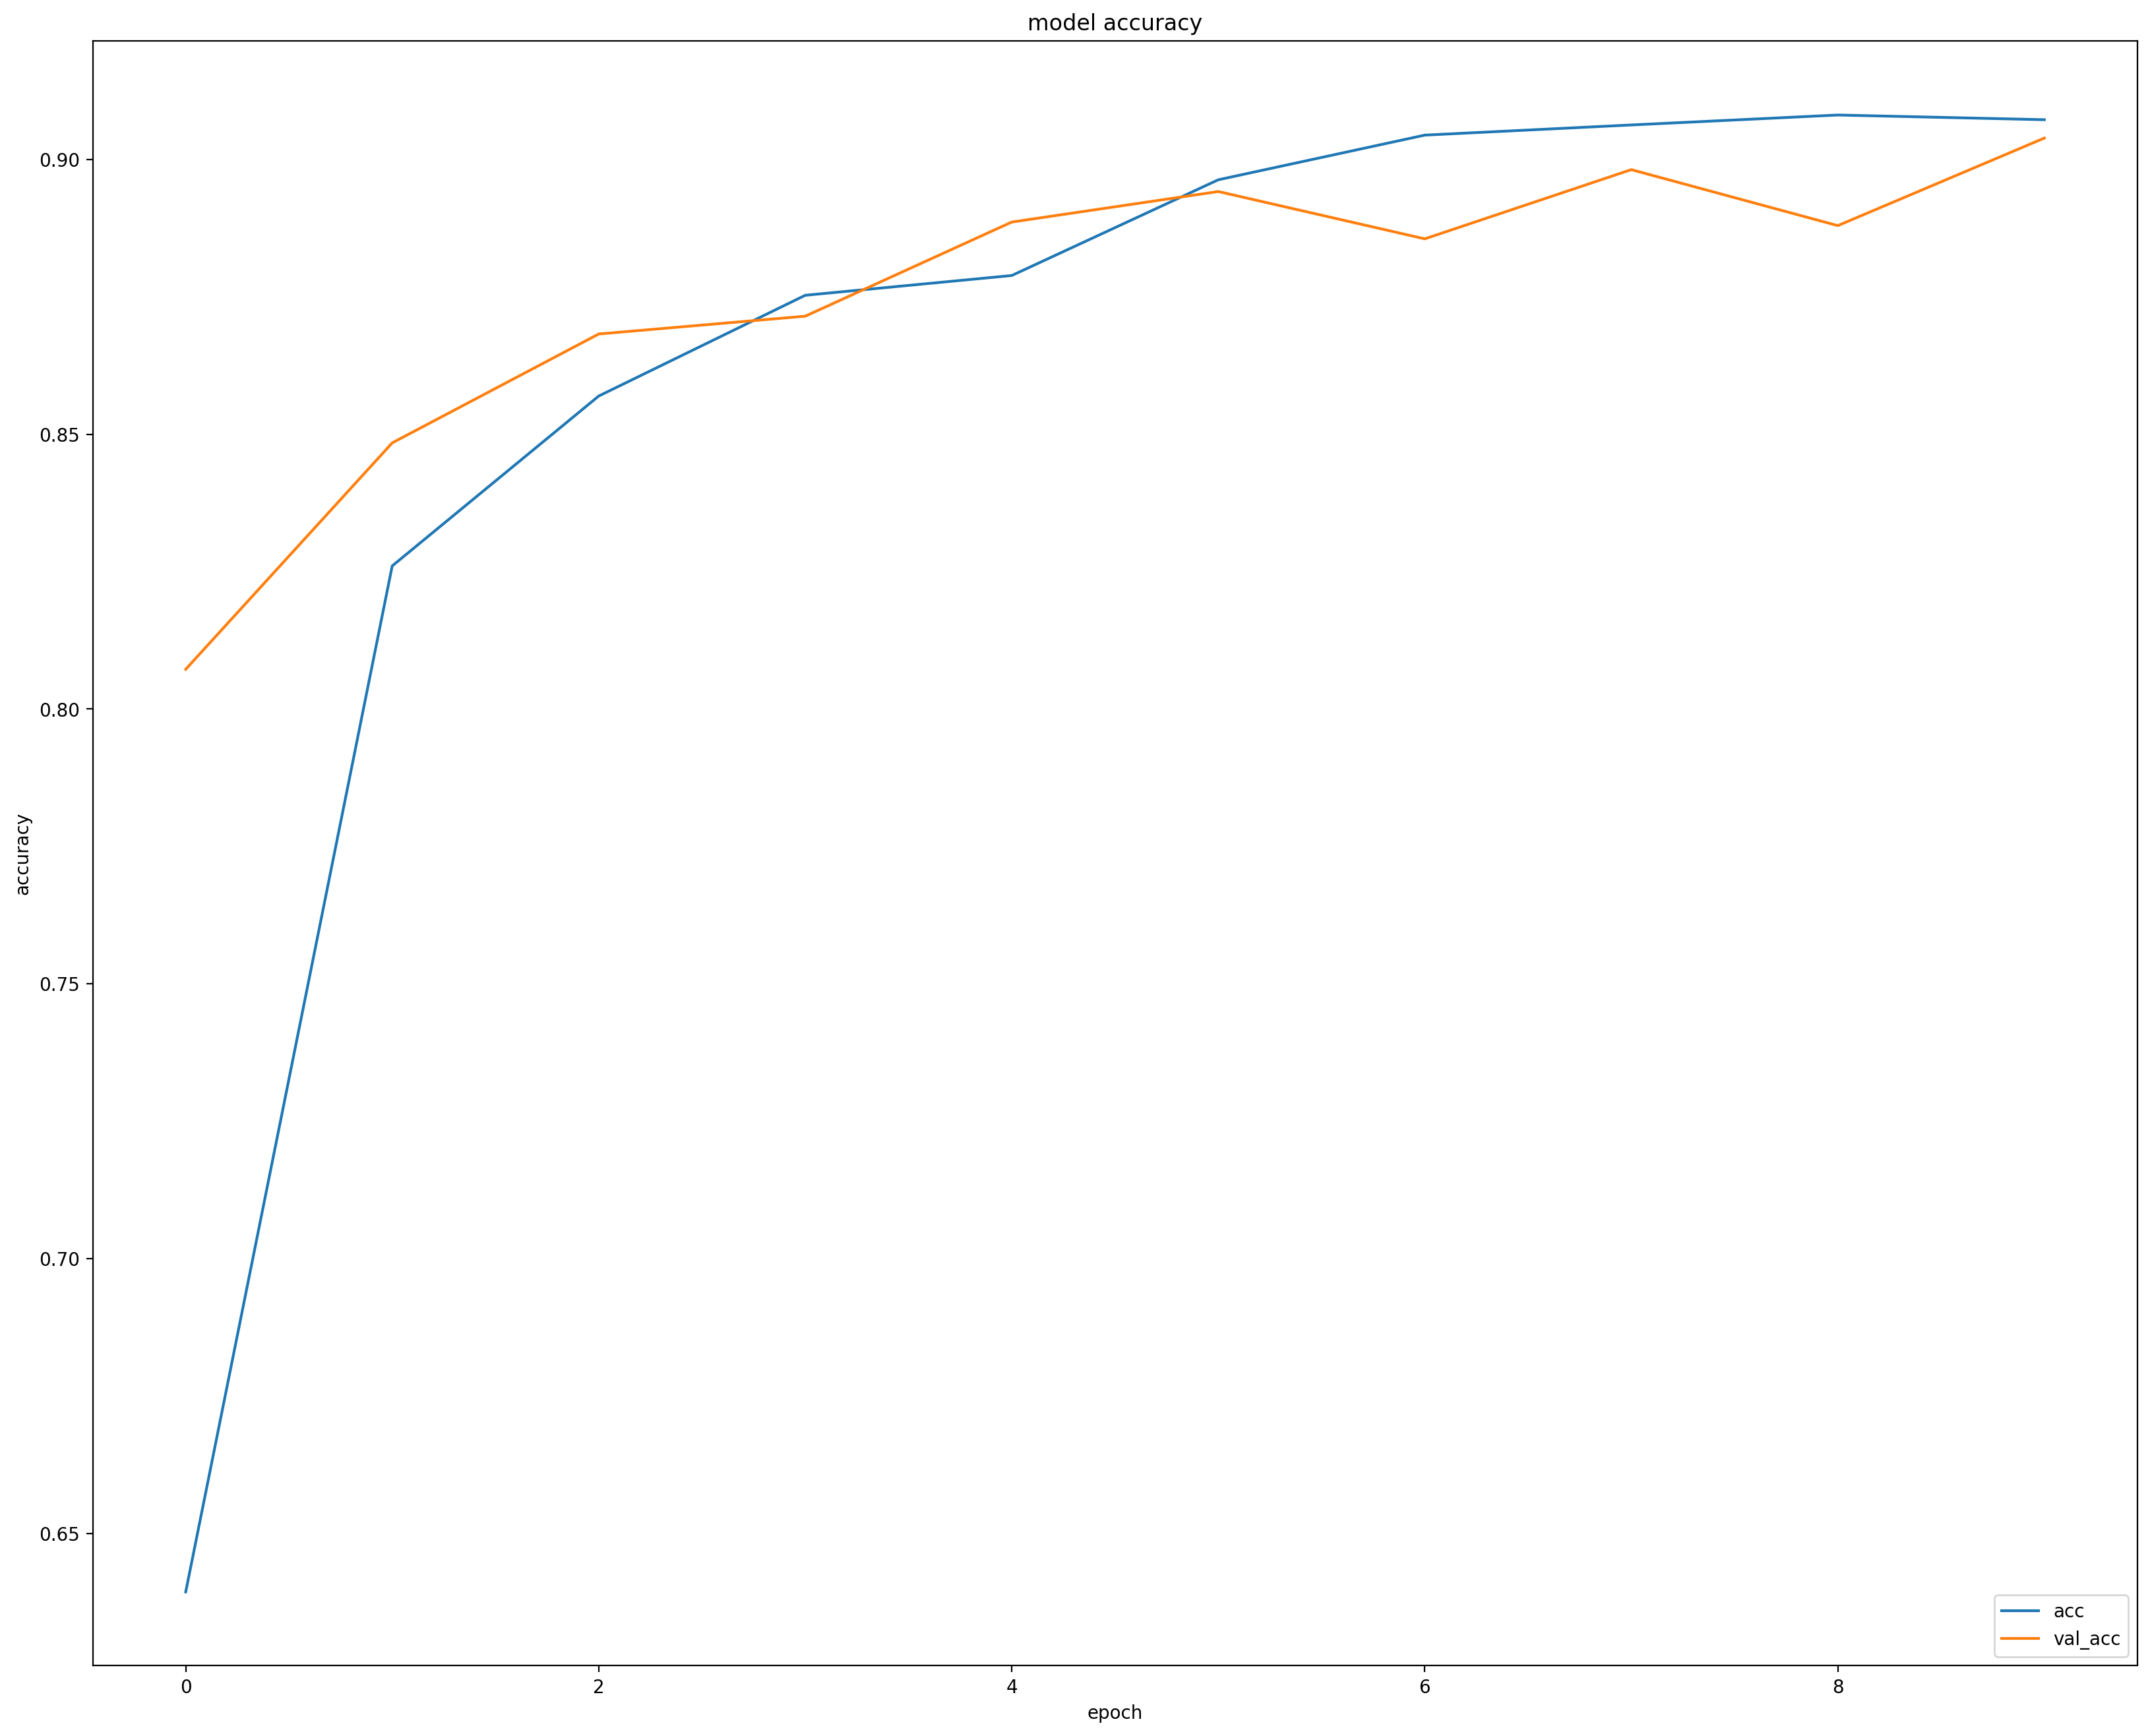

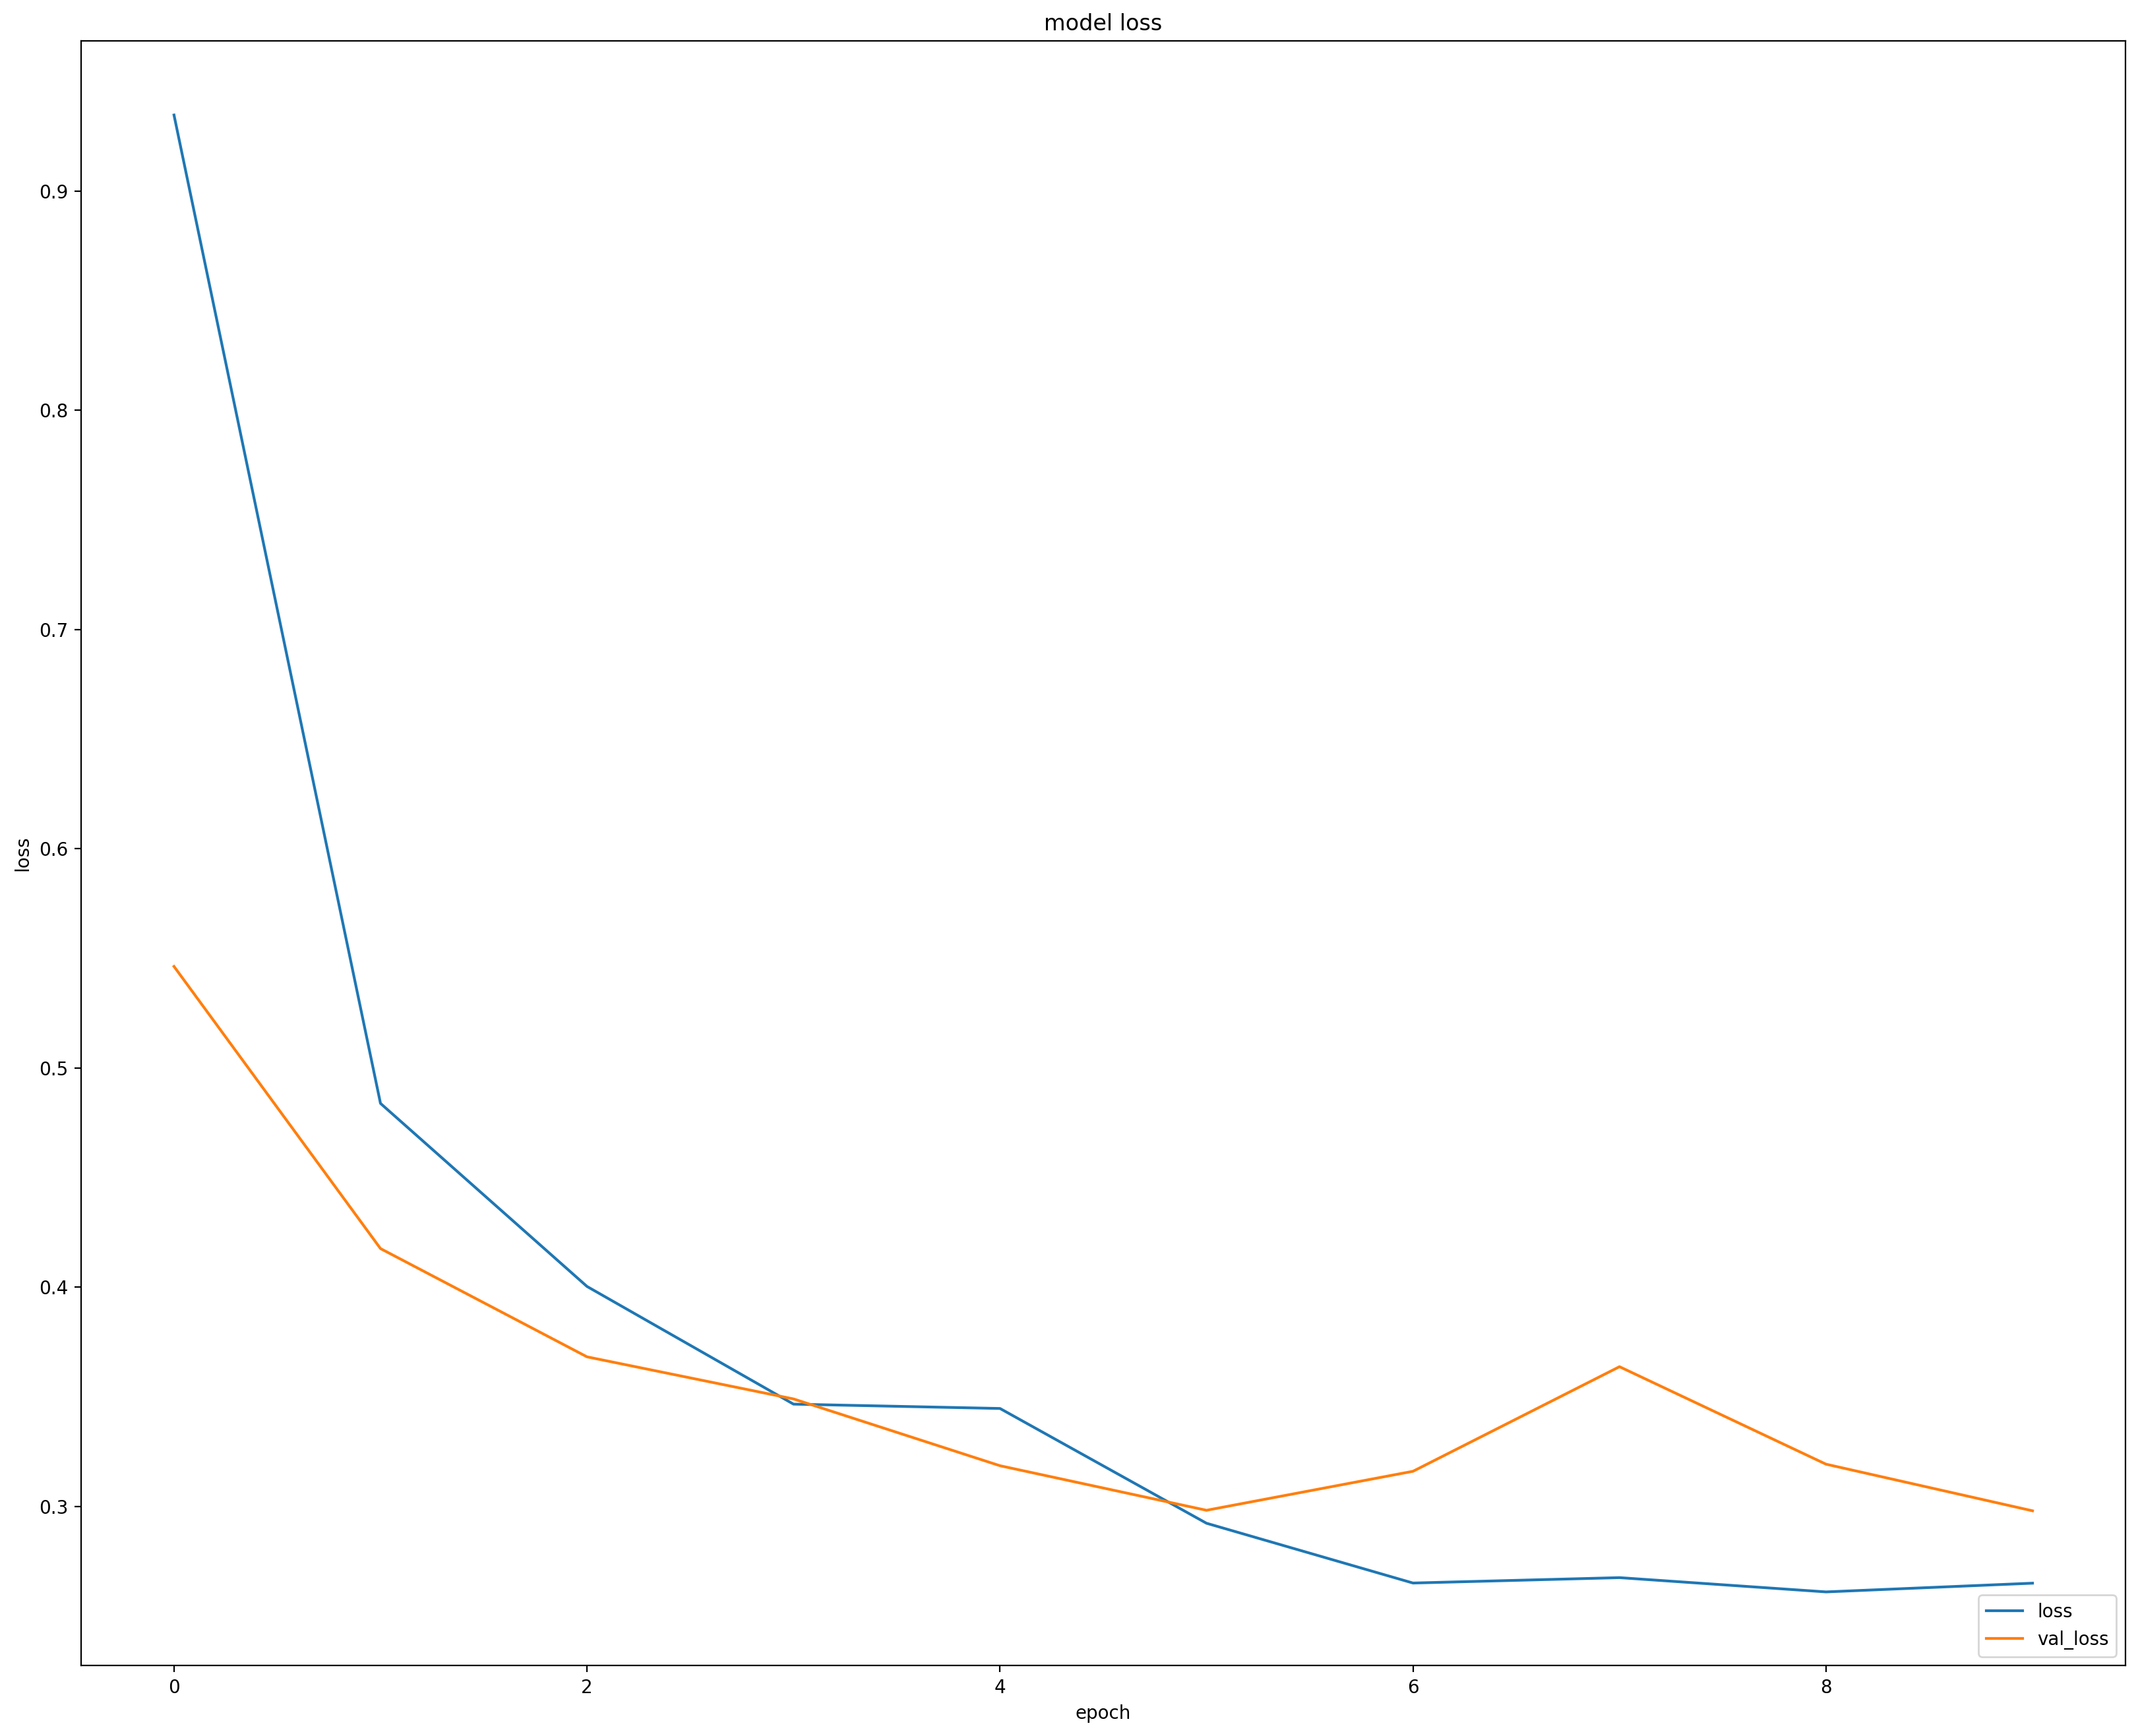

In [40]:
def plot_history(history):

    # accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()
plot_history(history)

In [45]:
y_test_dl

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


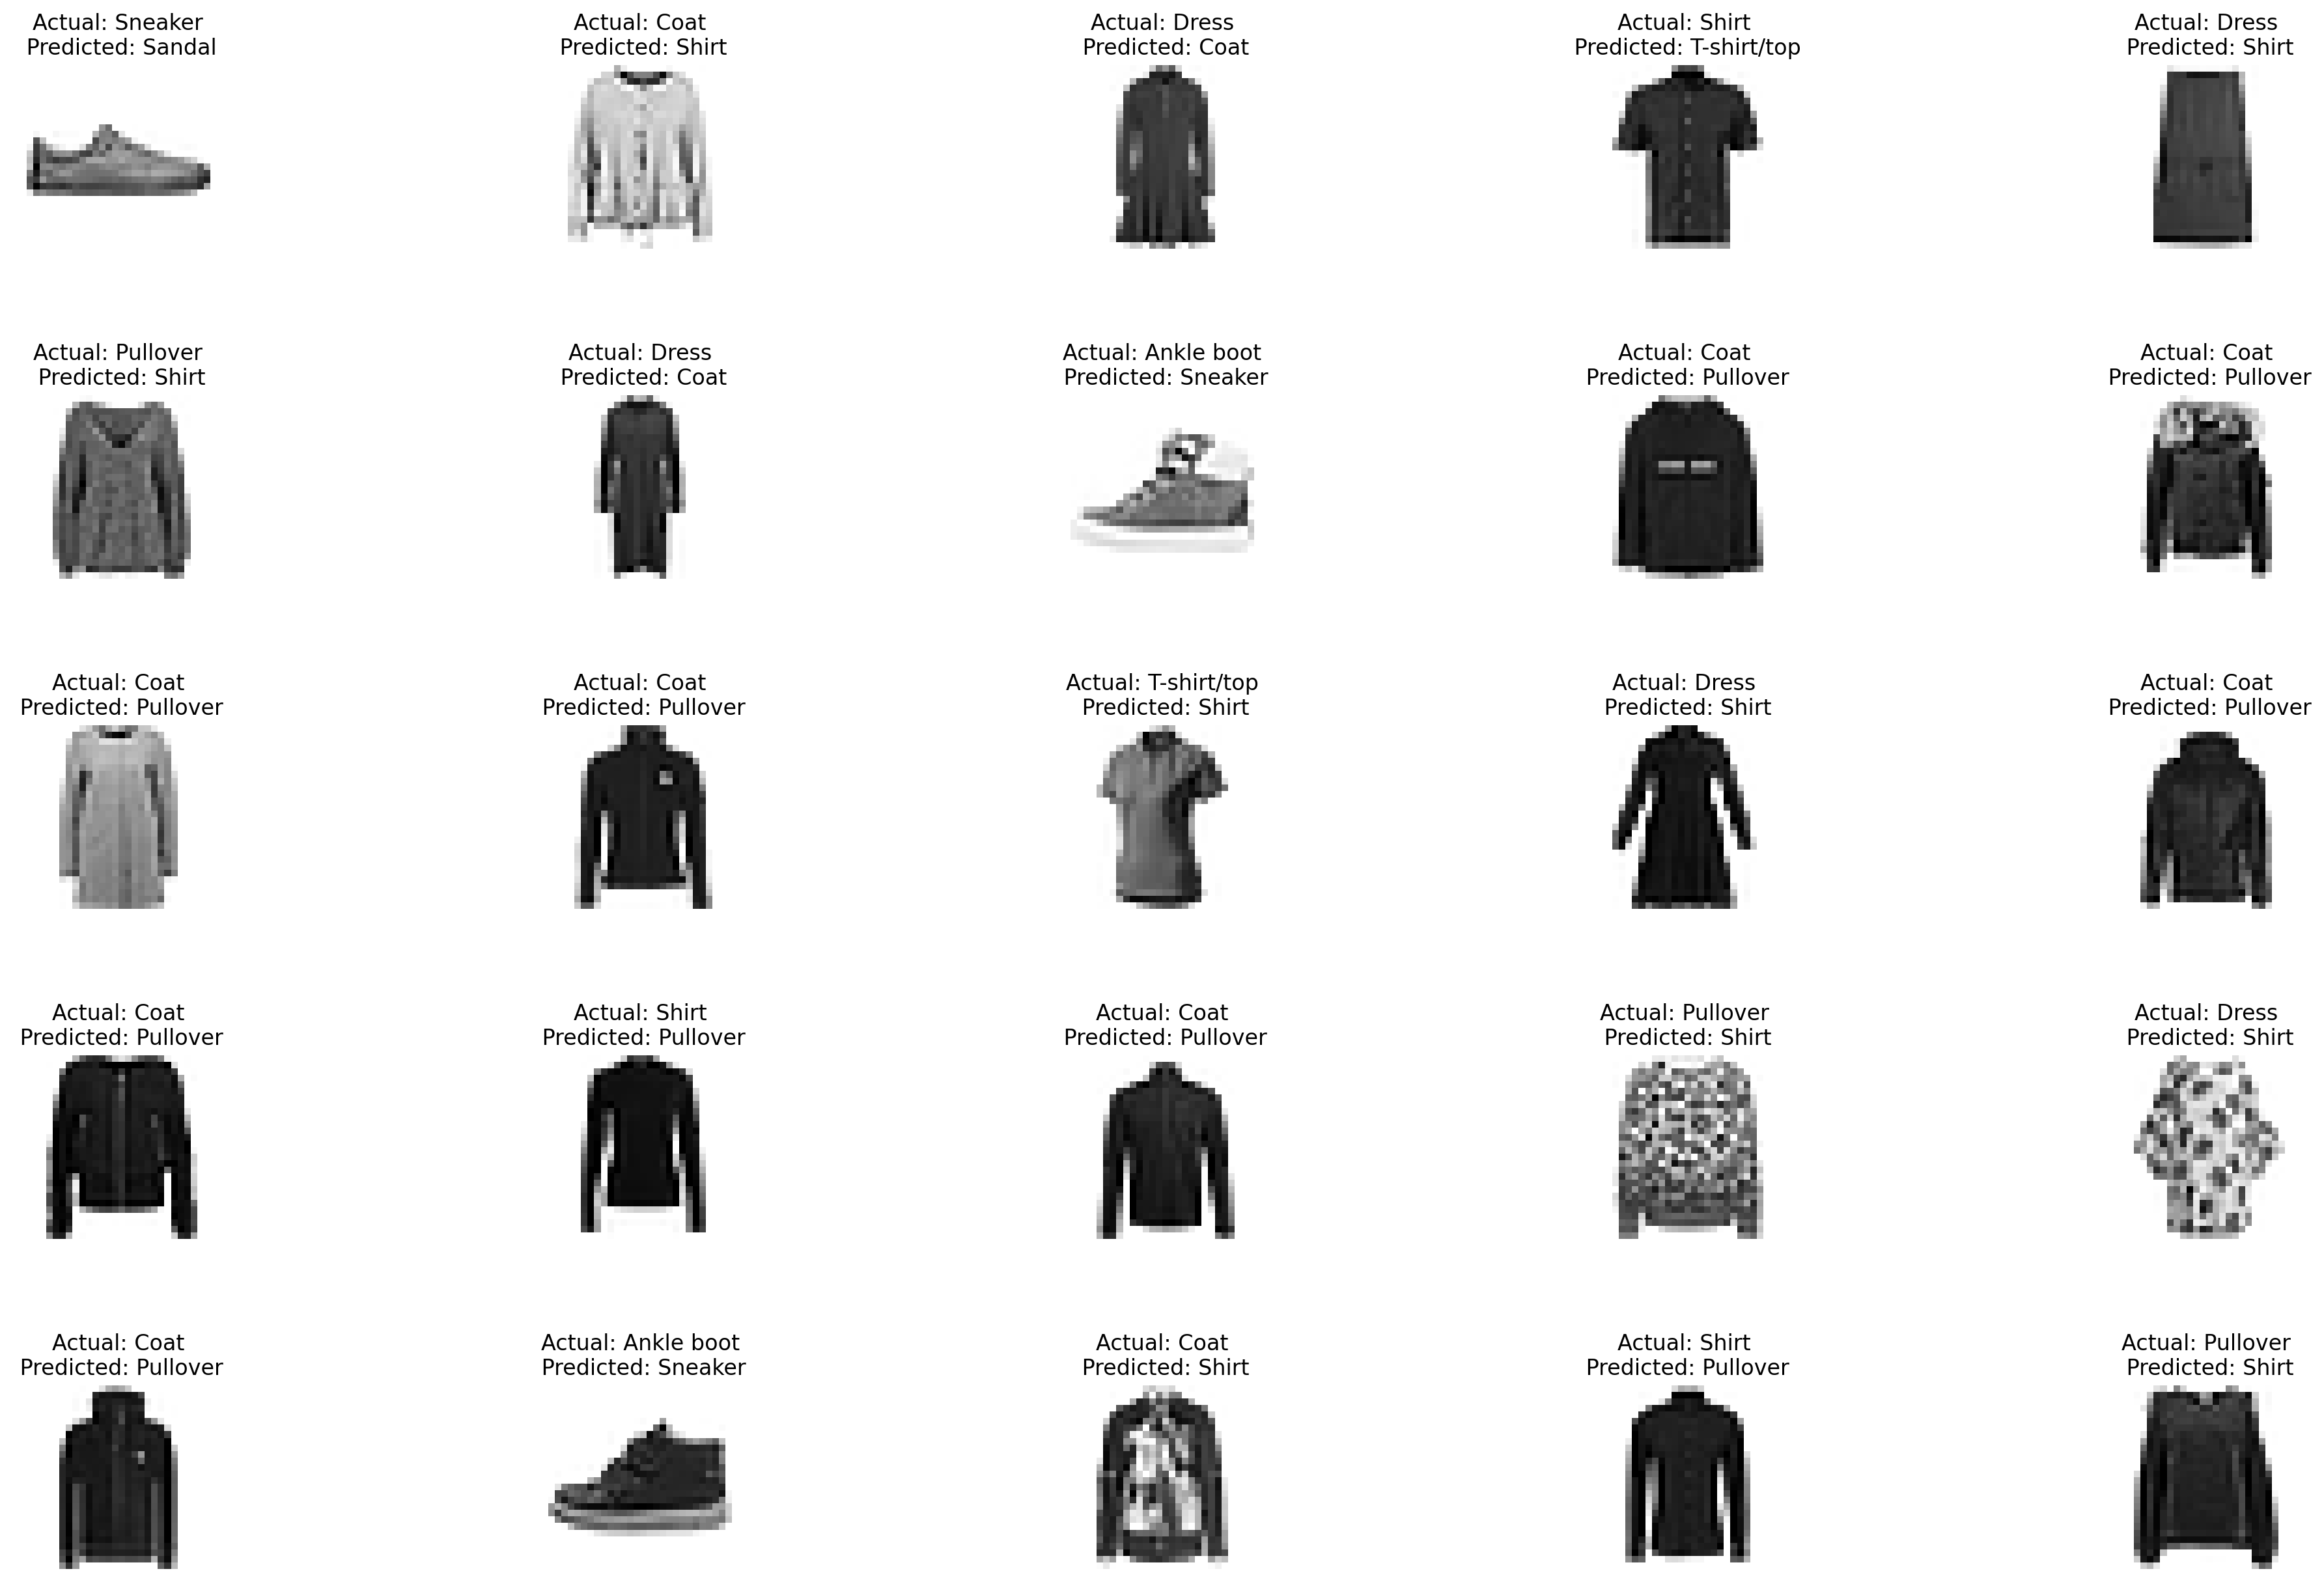

In [43]:
grid_w = 5
grid_l = 5
fig, axis = plt.subplots(grid_l, grid_w, figsize=(25, 15))
predicted_classes = model.predict(test_X).argmax(axis=1)
axis = axis.ravel()
k=0
mis_cls=[i for i in range(len(predicted_classes)) if predicted_classes[i]!=y_test[i]]
for a in range(grid_l * grid_w):
    i = mis_cls[k]
    k+=1
    axis[a].imshow(x_test[i].reshape((28, 28)), cmap=plt.cm.binary)
    axis[a].axis('off')
    axis[a].set_title(f"Actual: {labels[y_test[i]]}\n Predicted: {labels[predicted_classes[i]]}")
plt.subplots_adjust(hspace=0.8)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


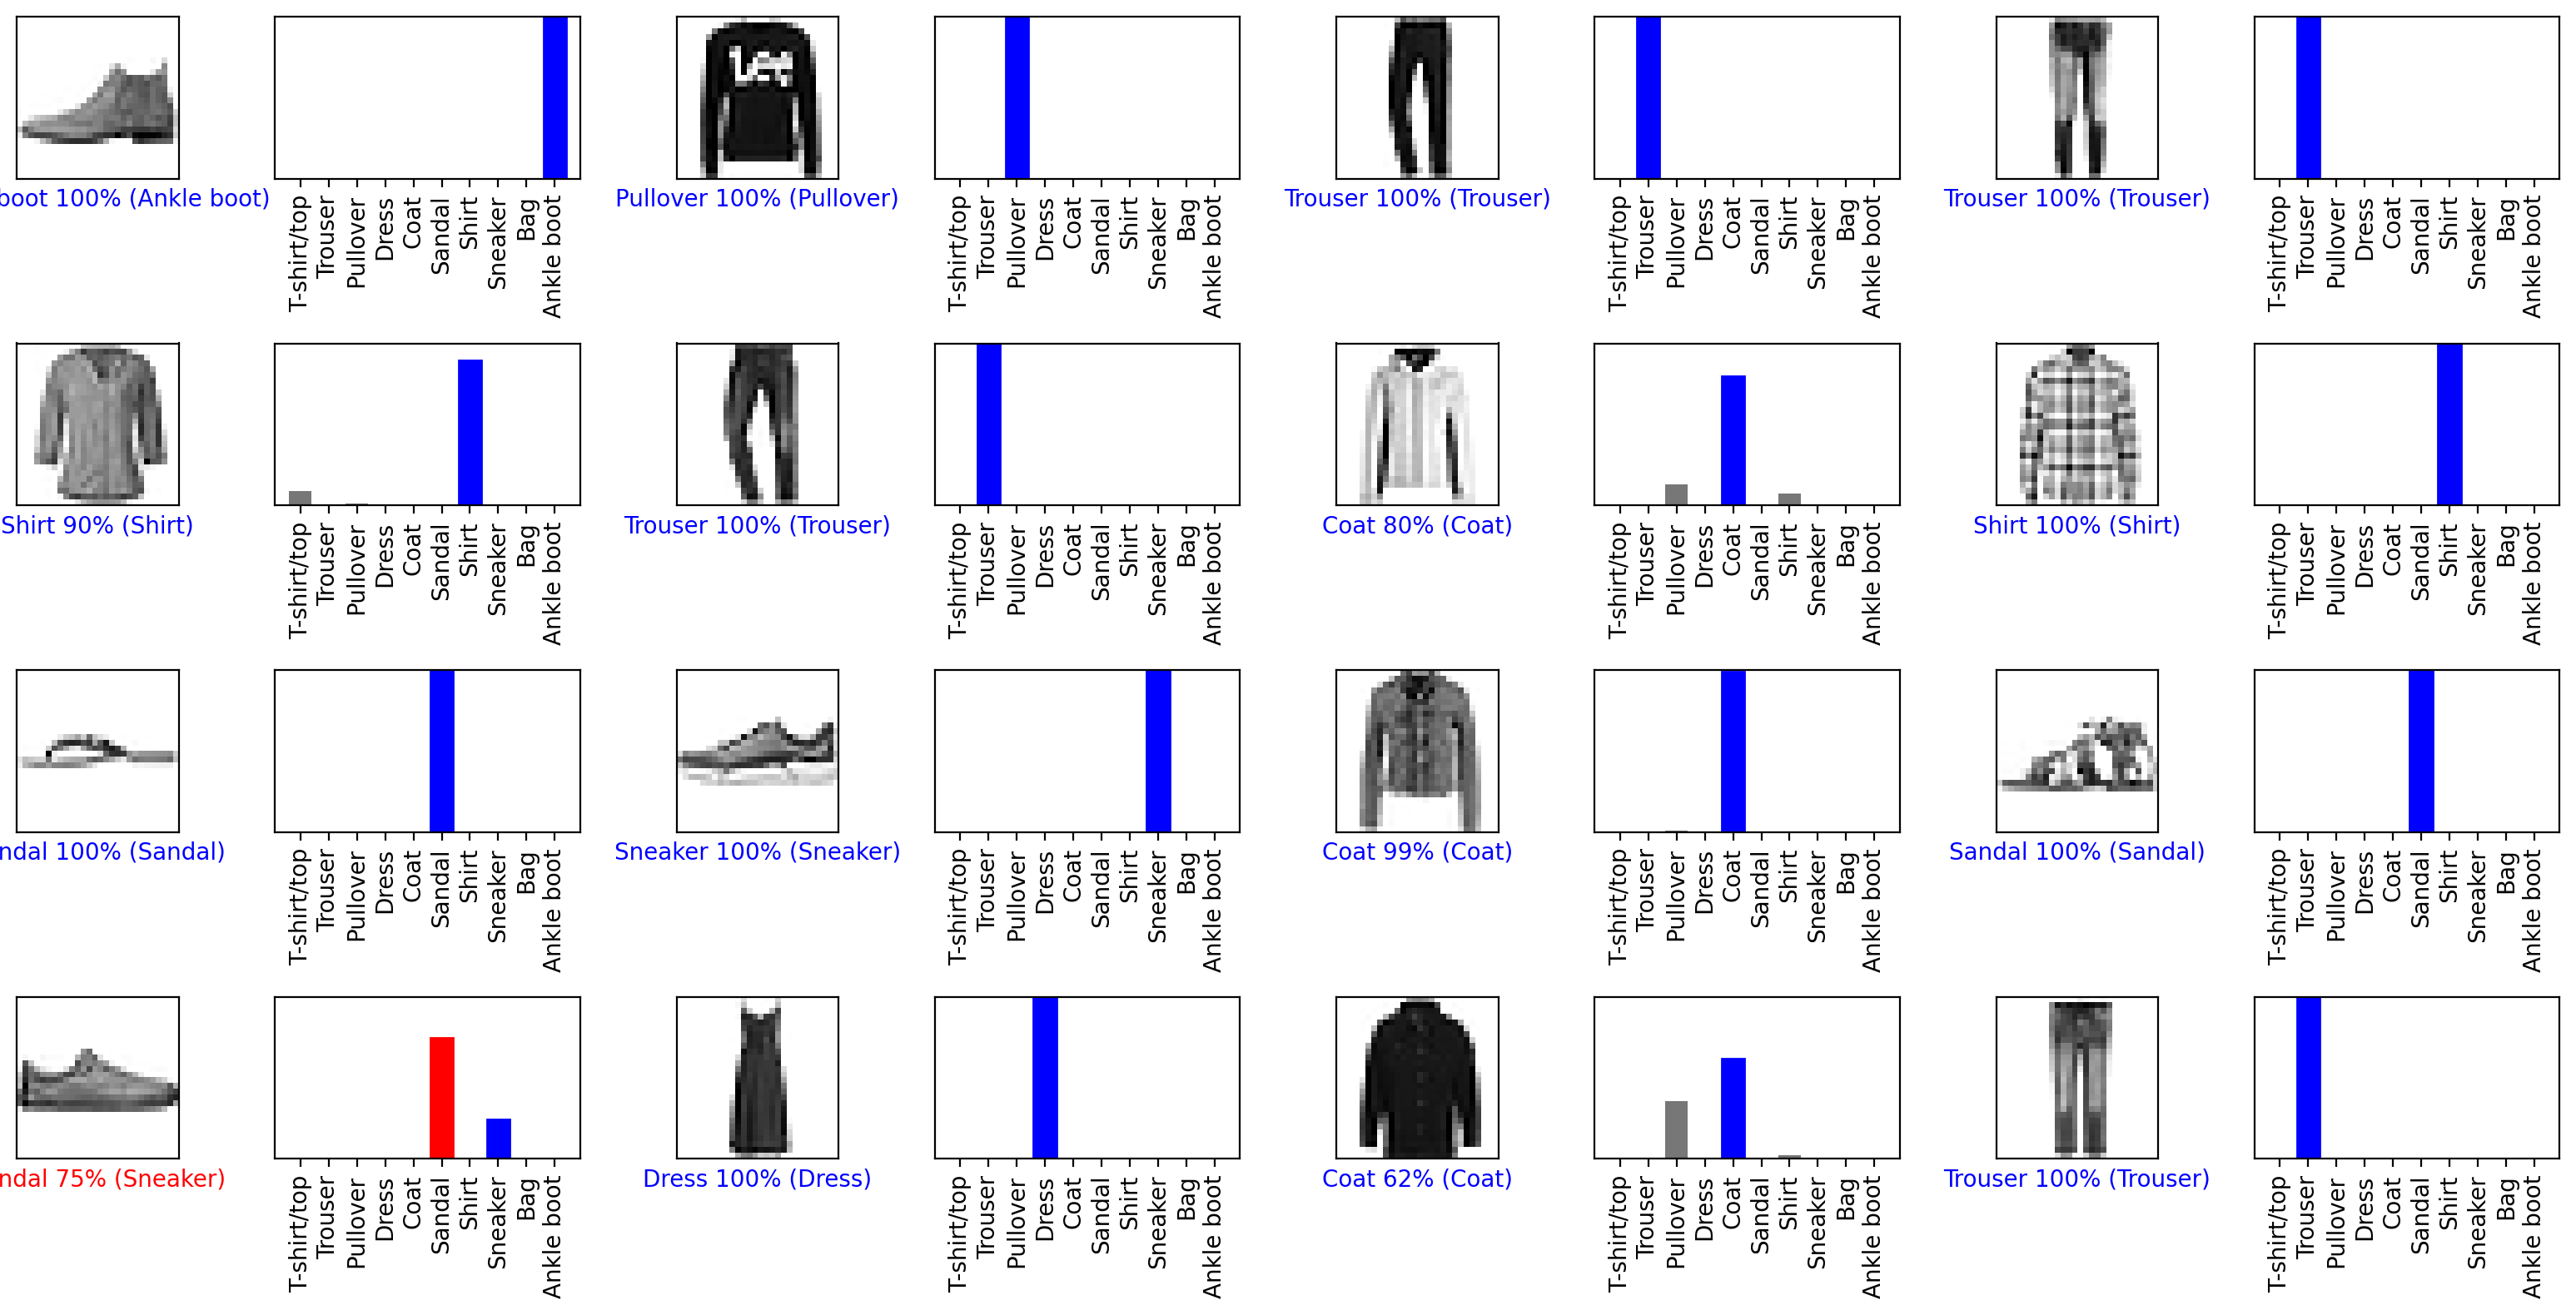

In [44]:
# This visualization part is taken from https://www.tensorflow.org/tutorials/keras/classification#verify_predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label], 100*np.max(predictions_array), labels[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10), labels, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

    
predictions = model.predict(test_X)
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()